Source: https://www.youtube.com/watch?v=QIUxPv5PJOY&t=824s

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 16.0 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=c2e4140ba5aa4141b6b3b0da7c0d34d35c95b997298d53e44b0a667ba33e0329
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
plt.style.use('fivethirtyeight')

AAPL = yf.Ticker("AAPL")

# get stock info
AAPL.info

# get historical market data

df = yf.download("AAPL", start="2012-01-01", end="2019-12-17")
#df = AAPL.history(period="max")
#df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.610315,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.678085,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.818838,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.952841,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.932299,394024400
...,...,...,...,...,...,...
2019-12-10,67.150002,67.517502,66.464996,67.120003,66.234108,90420400
2019-12-11,67.202499,67.775002,67.125000,67.692497,66.799057,78756800
2019-12-12,66.945000,68.139999,66.830002,67.864998,66.969292,137310400


In [ ]:
df.shape

(2002, 6)

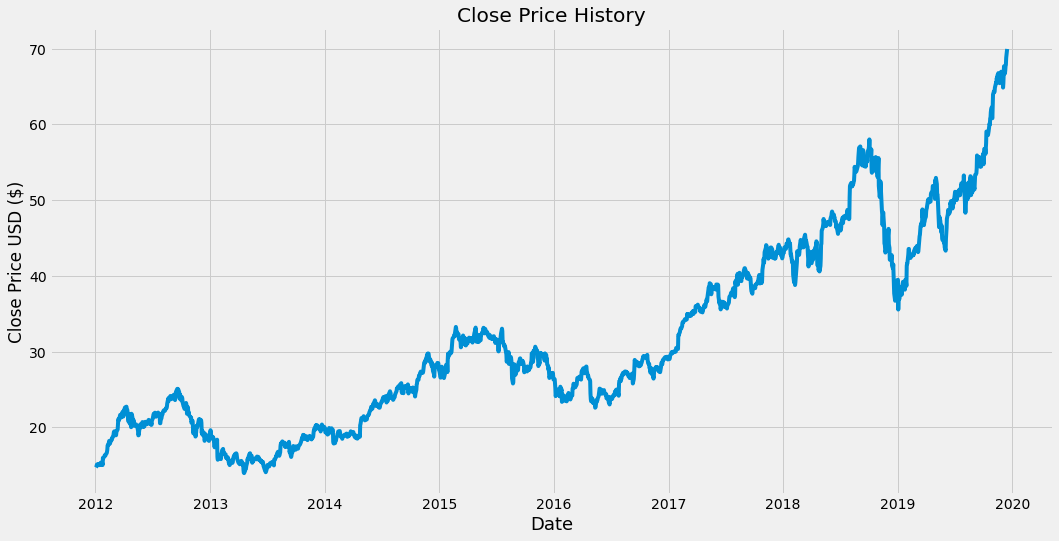

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)')
plt.show()

In [ ]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows on which to train the model
training_data_len = math.ceil( len(dataset) * .8 )
training_data_len
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.0131974 ],
       [0.01460639],
       [0.01753278],
       ...,
       [0.96251174],
       [0.97897982],
       [1.        ]])

In [ ]:
#Create the data training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.0131974 , 0.01460639, 0.01753278, 0.0203189 , 0.01989174,
       0.02085445, 0.02041453, 0.01967497, 0.01866762, 0.02178528,
       0.02459691, 0.02372983, 0.01898002, 0.02351306, 0.01905016,
       0.03578601, 0.03449178, 0.0361813 , 0.03983449, 0.0420468 ,
       0.04186191, 0.04117973, 0.04408699, 0.04682209, 0.04992063,
       0.05492545, 0.06543874, 0.06559812, 0.0714509 , 0.07582451,
       0.06830775, 0.07120224, 0.07114487, 0.07926096, 0.07810697,
       0.08024277, 0.08408086, 0.08621669, 0.0923691 , 0.0968511 ,
       0.09814534, 0.09859802, 0.09093461, 0.08908567, 0.08935984,
       0.09656423, 0.09859166, 0.10294617, 0.1132108 , 0.12690551,
       0.12434252, 0.12434889, 0.13425015, 0.13734869, 0.13514271,
       0.13312806, 0.13103049, 0.13799896, 0.14278065, 0.14478257])]
[0.139835129205152]

[array([0.0131974 , 0.01460639, 0.01753278, 0.0203189 , 0.01989174,
       0.02085445, 0.02041453, 0.01967497, 0.01866762, 0.02178528,
       0.02459691, 0.02372983, 0.0189

In [ ]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train) 
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1542, 60, 1)

In [ ]:
#Build the LTSM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


1542/1542 [==============================] - 34s 9ms/step - loss: 0.0017


In [ ]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i  in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [ ]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [ ]:
#Get the models' predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#Get the root mean squared error (RSME) where lower value better
rsme = np.sqrt( np.mean( predictions - y_test )**2 )
rsme

2.0102539253234863

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

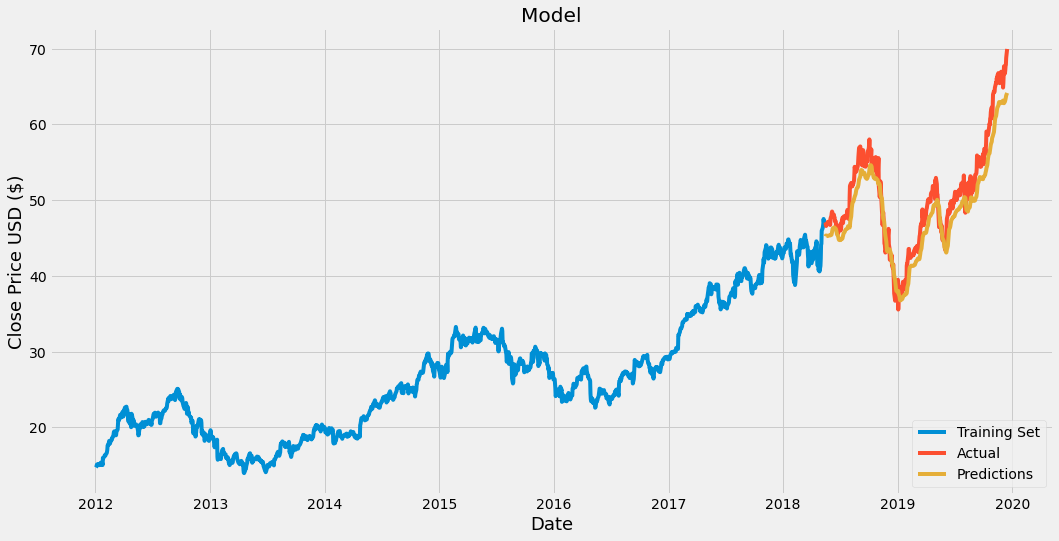

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Training Set', 'Actual', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-05-16,47.044998,45.207638
2018-05-17,46.747501,45.303722
2018-05-18,46.577499,45.327049
2018-05-21,46.907501,45.291840
2018-05-22,46.790001,45.275444
...,...,...
2019-12-10,67.120003,63.178280
2019-12-11,67.692497,63.354069
2019-12-12,67.864998,63.582497


In [ ]:
#Get the quote and show actual price on Dec 18 2019
apple_quote2 = df = yf.download("AAPL", start="2019-12-17", end="2019-12-19")
print(apple_quote2['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2019-12-17    70.102501
2019-12-18    69.934998
Name: Close, dtype: float64
